This is a simulation for the coupled BaFe2Se3 plaquettes model.

In [16]:
%matplotlib notebook
from matplotlib import pyplot as plt
import numpy as np
import histogram.hdf as hh, histogram as H

In [2]:
!pwd
!ls

/SNS/users/p63/mcvine/research/BaFe2Se3-coupled-plaquettes/coupledModel_150meV
samples  scattering  startJupterNotebookInBackground.sh  Untitled.ipynb


In [3]:
%cd samples/X/sampleassembly/

/SNS/users/p63/mcvine/research/BaFe2Se3-coupled-plaquettes/coupledModel_150meV/samples/X/sampleassembly


In [4]:
!ls

FeX.xyz  sampleassembly.xml  X-scatterer.xml  X.xyz


In [5]:
!cat X-scatterer.xml

<?xml version="1.0"?>

<!DOCTYPE scatterer>

<!-- weights: absorption, scattering, transmission -->
<homogeneous_scatterer 
    mcweights="0, 1, 0.1"
    max_multiplescattering_loops="3"
    >
  
 <KernelContainer average="yes">

  <E_vQ_Kernel 
     E_Q="S:=2; JR:=" 
     S_Q="1"
     Qmin="0./angstrom"
     Qmax="18/angstrom"
    />
    
  <E_Q_Kernel
    E_Q="88"
    S_Q="1"
    Qmin="0./angstrom"
    Qmax="18/angstrom"
    />
    
  <E_Q_Kernel
    E_Q="108"
    S_Q="1"
    Qmin="0./angstrom"
    Qmax="18/angstrom"
    />
    
  <E_Q_Kernel
    E_Q="196"
    S_Q="1"
    Qmin="0./angstrom"
    Qmax="18/angstrom"
    />
    
 </KernelContainer>
  
</homogeneous_scatterer>


In [ ]:
%%file write-scattering-kernel.py

# not finished
import numpy as np

# define parameters
SJR = -33.0
SJ1 = -43.0
SJ2 = 11.0
SJ3 = 15.0
SJ1p = 8.0
SJ2p = 6.0
SJ5 = 0.0 # 4.0
SDa = -0.08 # 0.0

S = 2.0

JR = SJR / S
J1 = SJ1 / S
J2 = SJ2 / S
J3 = SJ3 / S
J1p = SJ1p / S
J2p = SJ2p / S
J5 = SJ5 / S
A = SDa / S

# reduce expression for E1
x1 = S / np.sqrt(2)
x21 = 8*(A**2) + (J1p + J2p + 2*J3)**2
x22 = 4*(J1p + J2p + 2*J3)*J5 - 16*((J5)**2)
x23 = 0.0 - 8*A*(J1p + J2p + 2*J3 + J5)
x2 = x21 + x22 + x23
cos2Kcoef = 0.0 - 12*(J1p + J2p + 2*J3)*J5
cos4Kcoef = 0.0 - ((J1p + J2p + 2.0*J3))

E1 = 'E_Q="x:='
if(x2 != 0.0):
    E1 = E1 + '%s'
    

ostream = open('submit.sh', 'wt')




for a in np.arange(-90, 90.1, 1.):
    ostream.write('./scripts/sim.py --angle=%s \n' % a)
    continue
ostream.close()

In [6]:
%%file X-scatterer.xml

<?xml version="1.0"?>

<!DOCTYPE scatterer>

<!-- weights: absorption, scattering, transmission -->
<homogeneous_scatterer 
    mcweights="0, 1, 0.1"
    max_multiplescattering_loops="3"
    >
  
 <KernelContainer average="yes">

  <E_vQ_Kernel 
     E_Q="S:=2; JR:=-33.0/S; J1:=-43.0/S; J2:=11.0/S; J3:=15.0/S;
        J1p:=8.0/S; J2p:=6.0/S; J5:=0.0/S; A:=-0.08/S;
        a:=5; b:=5; c:=5;
        x1:=S/sqrt(2);
        x21:=8*(A^2)+(J1p+J2p+2*J3)^2;
        x22:=4*(J1p+J2p+2*J3)*J5-16*(J5)^2;
        x23:=-8*A*(J1p+J2p+2*J3+J5);
        x24:=-12*(J1p+J2p+2*J3)*J5*cos(b*Qy)-((J1p+J2p+2*J3)^2)*cos(2*b*Qy);
        x20:=x21+x22+x23+x24;
        x1*sqrt(x20)" 
     S_Q="1"
     Emax="50*meV"
     orientation="0.894427191,0.0,-0.4472135955,0.0,1.0,0.0,0.4472135955,0.0,0.894427191"
    />
    
  <E_vQ_Kernel
    E_Q="S:=2; JR:=-33.0/S; J1:=-43.0/S; J2:=11.0/S; J3:=15.0/S;
        J1p:=8.0/S; J2p:=6.0/S; J5:=0.0/S; A:=-0.08/S;
        a:=5; b:=5; c:=5;
        x11:=2*A+2*J1-J1p-J2p-2*(J3+J5-JR)+(J1p-J2p-2*J3)*cos(b*Qy);
        x12:=2*A+2*J1-J1p-J2p-2*J3+2*JR+(0.0-J1p+J2p+2*J3)*cos(b*Qy);
        x1:=x11*x12;
        S*sqrt(x1)"
    S_Q="1"
    Emax="200*meV"
    orientation="0.894427191,0.0,-0.4472135955,0.0,1.0,0.0,0.4472135955,0.0,0.894427191"
    />
    
  <E_vQ_Kernel
    E_Q="S:=2; JR:=-33.0/S; J1:=-43.0/S; J2:=11.0/S; J3:=15.0/S;
        J1p:=8.0/S; J2p:=6.0/S; J5:=0.0/S; A:=-0.08/S;
        a:=5; b:=5; c:=5;
        x11:=2*A-J1p+2*J2-J2p-2*(J3+J5-JR)+(0.0-J1p+J2p-2*J3)*cos(b*Qy);
        x12:=2*A-J1p+2*J2-J2p-2*J3+2*JR+(J1p-J2p+2*J3)*cos(b*Qy);
        x1:=x11*x12;
        S*sqrt(x1)"
    S_Q="1"
    Emax="100*meV"
    orientation="0.894427191,0.0,-0.4472135955,0.0,1.0,0.0,0.4472135955,0.0,0.894427191"
    />
    
  <E_vQ_Kernel
    E_Q="S:=2; JR:=-33.0/S; J1:=-43.0/S; J2:=11.0/S; J3:=15.0/S;
        J1p:=8.0/S; J2p:=6.0/S; J5:=0.0/S; A:=-0.08/S;
        a:=5; b:=5; c:=5;
        x1:=8*(A^2)+8*((J1)^2)+((J1p)^2)-8*J1p*J2+8*((J2)^2);
        x12:=2*J1p*J2p-8*J2*J2p;
        x2:=((J2p)^2)+12*J1p*J3-16*J2*J3+12*J2p*J3+4*((J3)^2);
        x22:=8*A*(2*J1-J1p+2*J2-J2p-2*J3-J5);
        x3:=4*(J1p-2*J2+J2p+2*J3)*J5-16*((J5)^2)-8*J1*(J1p-2*J2+J2p+2*J3+J5);
        x4:=(J1p+J2p-2*J3)*(12*J5*cos(b*Qy)-(J1p+J2p-2*J3)*cos(2*b*Qy));
        x0:=x1+x12+x2+x22+x3+x4;
        (S/sqrt(2))*sqrt(x0)"
    S_Q="1"
    Emax="120*meV"
    orientation="0.894427191,0.0,-0.4472135955,0.0,1.0,0.0,0.4472135955,0.0,0.894427191"
    />
    
 </KernelContainer>
  
</homogeneous_scatterer>

Overwriting X-scatterer.xml


In [7]:
!ls

FeX.xyz  sampleassembly.xml  X-scatterer.xml  X.xyz


In [8]:
!cat FeX.xyz

8
11.89620 0 0    0 5.44930 0    0 0 9.16497
Fe 0.49627 0.99009 0.35234
Fe 0.50373 0.99009 0.64766
Fe 0.00373 0.00991 0.85234
Fe 0.99627 -0.99009 0.14766
Fe 0.50373 0.50991 0.64766
Fe 0.49627 0.50991 0.35234
Fe 0.99627 0.49009 0.14766
Fe 0.00373 0.49009 0.85234


In [9]:
!cat X.xyz

8
3 0 0    0 3 0    0 0 3
V 0 0 0
V 0 0 0
V 0 0 0
V 0 0 0
V 0 0 0
V 0 0 0
V 0 0 0
V 0 0 0

In [10]:
!mv X.xyz .X.xyz

In [11]:
!mv FeX.xyz X.xyz

In [12]:
!cat X.xyz

8
11.89620 0 0    0 5.44930 0    0 0 9.16497
Fe 0.49627 0.99009 0.35234
Fe 0.50373 0.99009 0.64766
Fe 0.00373 0.00991 0.85234
Fe 0.99627 -0.99009 0.14766
Fe 0.50373 0.50991 0.64766
Fe 0.49627 0.50991 0.35234
Fe 0.99627 0.49009 0.14766
Fe 0.00373 0.49009 0.85234


In [14]:
!cat sampleassembly.xml

<SampleAssembly name="X">

    <PowderSample name="X" type="sample">
        <Shape>
            <cylinder radius="5*mm" height="20*mm"/>
        </Shape>
        <Phase type="crystal">
            <ChemicalFormula>Fe</ChemicalFormula>
            <xyzfile>X.xyz</xyzfile>
        </Phase>
    </PowderSample>
    
    <LocalGeometer registry-coordinate-system="InstrumentScientist">
        <Register name="X" position="(0,0,0)" orientation="(0,0,0)"/>
    </LocalGeometer>

</SampleAssembly>

In [17]:
a,b,c=11.89620,5.44930,9.16497

from numpy import sin, cos, deg2rad
a1 = [a, 0, 0]
a2 = [0, b, 0]
a3 = [0, 0, c]

twopi = 2*np.pi
f = twopi/np.dot(a1, np.cross(a2, a3))
b1 = np.cross(a2,a3) * f
b2 = np.cross(a3,a1) * f
b3 = np.cross(a1,a2) * f
b1,b2,b3

(array([ 0.52816742,  0.        ,  0.        ]),
 array([ 0.        ,  1.15302613,  0.        ]),
 array([ 0.        ,  0.        ,  0.68556529]))

#### Orientation of the kernel
Here we need to use the convention that z is along beam, y vertical up.
The kernel has its own cartesian axis e’x e’y e’z. Because we know
u = 102 v = 100
, we have the basis vectors of the instrument coordinate system

    ez along b1 + 2*b3
    ex along b1
    

So we have them in the reciprocal cartesian axis

In [19]:
ez = b1 + 2*b3; ez /= np.linalg.norm(ez)
ex1 = b1
ey = np.cross(ez, ex1); ey/=np.linalg.norm(ey)
ex = np.cross(ey, ez)
ex, ey, ez

(array([ 0.93316089,  0.        , -0.35945897]),
 array([ 0.,  1.,  0.]),
 array([ 0.35945897,  0.        ,  0.93316089]))

The rotation matrix is define as
```
    ex.ex’ ex.ey’ ex.ez’ 
R = ey.ex’ ey.ey’ ey.ez’
    ez.ex’ ez.ey’ ez.ez’
```
So

In [20]:
R = np.array([ ex, ey, ez ])
Rflat = R.copy(); Rflat.shape = -1,
R, Rflat

(array([[ 0.93316089,  0.        , -0.35945897],
        [ 0.        ,  1.        ,  0.        ],
        [ 0.35945897,  0.        ,  0.93316089]]),
 array([ 0.93316089,  0.        , -0.35945897,  0.        ,  1.        ,
         0.        ,  0.35945897,  0.        ,  0.93316089]))

Now we update the orientation parameter in the scattering kernels:

In [21]:
'orientation="%s"' % (','.join(str(e) for e in Rflat),)

'orientation="0.93316089156,0.0,-0.359458969096,0.0,1.0,0.0,0.359458969096,0.0,0.93316089156"'

In [39]:
%cd {workdir}/samples/X/sampleassembly

/SNS/users/p63/mcvine/research/BaFe2Se3-coupled-plaquettes/coupledModel_150meV/samples/X/sampleassembly


In [40]:
%%file X-scatterer.xml
<?xml version="1.0"?>

<!DOCTYPE scatterer>

<!-- weights: absorption, scattering, transmission -->
<homogeneous_scatterer 
    mcweights="0, 1, 0.1"
    max_multiplescattering_loops="3"
    >
  
 <KernelContainer average="yes">

  <E_vQ_Kernel 
     E_Q="S:=2; JR:=-33.0/S; J1:=-43.0/S; J2:=11.0/S; J3:=15.0/S;
        J1p:=8.0/S; J2p:=6.0/S; J5:=0.0/S; A:=-0.08/S;
        b:=5.44930;
        x1:=S/sqrt(2);
        x21:=8*(A^2)+(J1p+J2p+2*J3)^2;
        x22:=4*(J1p+J2p+2*J3)*J5-16*(J5)^2;
        x23:=-8*A*(J1p+J2p+2*J3+J5);
        x24:=-12*(J1p+J2p+2*J3)*J5*cos(b*Qy)-((J1p+J2p+2*J3)^2)*cos(2*b*Qy);
        x20:=x21+x22+x23+x24;
        x1*sqrt(x20)" 
     S_Q="1"
     Emax="50*meV"
     orientation="0.93316089156,0.0,-0.359458969096,0.0,1.0,0.0,0.359458969096,0.0,0.93316089156"
    />
    
  <E_vQ_Kernel
    E_Q="S:=2; JR:=-33.0/S; J1:=-43.0/S; J2:=11.0/S; J3:=15.0/S;
        J1p:=8.0/S; J2p:=6.0/S; J5:=0.0/S; A:=-0.08/S;
        b:=5.44930;
        x11:=2*A+2*J1-J1p-J2p-2*(J3+J5-JR)+(J1p-J2p-2*J3)*cos(b*Qy);
        x12:=2*A+2*J1-J1p-J2p-2*J3+2*JR+(0.0-J1p+J2p+2*J3)*cos(b*Qy);
        x1:=x11*x12;
        S*sqrt(x1)"
    S_Q="1"
    Emax="200*meV"
    orientation="0.93316089156,0.0,-0.359458969096,0.0,1.0,0.0,0.359458969096,0.0,0.93316089156"
    />
    
  <E_vQ_Kernel
    E_Q="S:=2; JR:=-33.0/S; J1:=-43.0/S; J2:=11.0/S; J3:=15.0/S;
        J1p:=8.0/S; J2p:=6.0/S; J5:=0.0/S; A:=-0.08/S;
        b:=5.44930;
        x11:=2*A-J1p+2*J2-J2p-2*(J3+J5-JR)+(0.0-J1p+J2p-2*J3)*cos(b*Qy);
        x12:=2*A-J1p+2*J2-J2p-2*J3+2*JR+(J1p-J2p+2*J3)*cos(b*Qy);
        x1:=x11*x12;
        S*sqrt(x1)"
    S_Q="1"
    Emax="100*meV"
    orientation="0.93316089156,0.0,-0.359458969096,0.0,1.0,0.0,0.359458969096,0.0,0.93316089156"
    />
    
  <E_vQ_Kernel
    E_Q="S:=2; JR:=-33.0/S; J1:=-43.0/S; J2:=11.0/S; J3:=15.0/S;
        J1p:=8.0/S; J2p:=6.0/S; J5:=0.0/S; A:=-0.08/S;
        b:=5.44930;
        x1:=8*(A^2)+8*((J1)^2)+((J1p)^2)-8*J1p*J2+8*((J2)^2);
        x12:=2*J1p*J2p-8*J2*J2p;
        x2:=((J2p)^2)+12*J1p*J3-16*J2*J3+12*J2p*J3+4*((J3)^2);
        x22:=8*A*(2*J1-J1p+2*J2-J2p-2*J3-J5);
        x3:=4*(J1p-2*J2+J2p+2*J3)*J5-16*((J5)^2)-8*J1*(J1p-2*J2+J2p+2*J3+J5);
        x4:=(J1p+J2p-2*J3)*(12*J5*cos(b*Qy)-(J1p+J2p-2*J3)*cos(2*b*Qy));
        x0:=x1+x12+x2+x22+x3+x4;
        (S/sqrt(2))*sqrt(x0)"
    S_Q="1"
    Emax="120*meV"
    orientation="0.93316089156,0.0,-0.359458969096,0.0,1.0,0.0,0.359458969096,0.0,0.93316089156"
    />
    
 </KernelContainer>
  
</homogeneous_scatterer>

Overwriting X-scatterer.xml


In [23]:
!ls

sampleassembly.xml  X-scatterer.xml  X.xyz


## Scattering

In [41]:
workdir = "/SNS/users/p63/mcvine/research/BaFe2Se3-coupled-plaquettes/coupledModel_150meV"
%cd {workdir}/scattering

/SNS/users/p63/mcvine/research/BaFe2Se3-coupled-plaquettes/coupledModel_150meV/scattering


In [26]:
!ls -l

total 32
lrwxrwxrwx 1 p63 users   70 Jun 29 09:52 beam -> ../../../BaFe2Se3_IndependentPlaquettesModel/beam_150meV_1e9_neutrons/
-rwxr-xr-x 1 p63 users  137 Jun 29 09:49 create-nxs
-rwxr-xr-x 1 p63 users  116 Jun 29 09:49 debug-scatter
-rw-r--r-- 1 p63 users 1572 Jun 29 09:49 Makefile
-rwxr-xr-x 1 p63 users  304 Jun 29 09:49 reduce2iqe
lrwxrwxrwx 1 p63 users   28 Jun 29 09:49 sampleassembly -> ../samples/X/sampleassembly/
-rwxr-xr-x 1 p63 users  223 Jun 29 09:49 scatter
-rwxr-xr-x 1 p63 users  513 Jun 29 09:49 sss
-rw-r--r-- 1 p63 users 1610 Jun 29 09:49 sss.pml
-rwxr-xr-x 1 p63 users  294 Jun 29 09:49 test-scatter


In [27]:
!rm beam create-nxs debug-scatter Makefile reduce2iqe

In [28]:
!pwd
!ls

/SNS/users/p63/mcvine/research/BaFe2Se3-coupled-plaquettes/coupledModel_150meV/scattering
sampleassembly	scatter  sss  sss.pml  test-scatter


In [29]:
!rm scatter sss sss.pml test-scatter

In [30]:
!ln -s /SNS/users/p63/mcvine/research/beams/beam_150meV_1e9_neutrons/ beam

In [31]:
!ls -l

total 0
lrwxrwxrwx 1 p63 users 62 Jul 21 15:36 beam -> /SNS/users/p63/mcvine/research/beams/beam_150meV_1e9_neutrons/
lrwxrwxrwx 1 p63 users 28 Jun 29 09:49 sampleassembly -> ../samples/X/sampleassembly/


In [32]:
!rsync -a ~lj7/simulations/mcvine_workflow/DGS/ARCS/single-crystal/* ./
!ls

beam  sampleassembly  scripts  template


In [33]:
%cd template

!ln -s ../../samples/X/sampleassembly

!ln -s ../beam beam

%cd ..

/SNS/users/p63/mcvine/research/BaFe2Se3-coupled-plaquettes/coupledModel_150meV/scattering/template
/SNS/users/p63/mcvine/research/BaFe2Se3-coupled-plaquettes/coupledModel_150meV/scattering


In [34]:
%%file sim.yml

cluster:
  nodes: 10
instrument:
  name: arcs
scatter:
  ncount: 1e6
  multiple_scattering: off
  template: ./template


Writing sim.yml


In [37]:
# Test the simulation for a single angle
!source ~lj7/.use-miniconda2
!source activate mcvine

discarding /SNS/users/lj7/software/miniconda2/envs/mcvine/bin from PATH
prepending /SNS/users/lj7/software/miniconda2/envs/mcvine/bin to PATH


Note:  If the below simulation test fails, you must do "rm -rf work_30.0" from the terminal, within the {workdir}/scattering_4 directory, to remove all the failed simulation pieces.  Otherwise, even if you fix the problem, MCViNE will continue to fail when it sees the old "pieces" of the failed simulation

In [42]:
!./scripts/sim.py --angle=30.0

SAMPLE_ANGLE=30.0 time ./scatter &> log.scatter
time ./create-nxs &> log.create-nxs

real	1m37.373s
user	12m13.272s
sys	1m26.751s
cp sim.nxs sim-30.0.nxs
mcvine instruments arcs nxs populate_metadata --type=Ei --beam_outdir=beam/out --nxs=sim-30.0.nxs
/SNS/users/lj7/software/miniconda2/envs/mcvine/lib/python2.7/site-packages/mcvine/deployment_info.py:41: UserWarning: Neither environment variable MCVINE_DIR nor DANSE_DIR was defined. Assumed that it is /SNS/users/lj7/software/miniconda2/envs/mcvine.
  warnings.warn(msg)


In [43]:
%%file create-submit.py
import numpy as np
ostream = open('submit.sh', 'wt')
for a in np.arange(-90, 90.1, 1.):
    ostream.write('./scripts/sim.py --angle=%s \n' % a)
    continue
ostream.close()

Writing create-submit.py


In [44]:
!cat create-submit.py

import numpy as np
ostream = open('submit.sh', 'wt')
for a in np.arange(-90, 90.1, 1.):
    ostream.write('./scripts/sim.py --angle=%s \n' % a)
    continue
ostream.close()

In [45]:
# run the script to create submit.sh
!python ./create-submit.py

In [46]:
# make sure submit.sh is executable
!chmod +x submit.sh
# and then start it script in the background

In [47]:
%%script bash --bg
./submit.sh
# this will take a while to finish.

Starting job # 0 in a separate thread.


In [48]:
# reduction
%cd "{workdir}/scattering"
!ls

/SNS/users/p63/mcvine/research/BaFe2Se3-coupled-plaquettes/coupledModel_150meV/scattering
beam		  work_-20.0  work_-35.0  work_-5.0   work_-64.0  work_-79.0
create-submit.py  work_20.0   work_35.0   work_5.0    work_64.0   work_79.0
sampleassembly	  work_-21.0  work_-36.0  work_-50.0  work_-65.0  work_-8.0
scripts		  work_21.0   work_36.0   work_50.0   work_65.0   work_8.0
sim.yml		  work_-22.0  work_-37.0  work_-51.0  work_-66.0  work_-80.0
submit.sh	  work_22.0   work_37.0   work_51.0   work_66.0   work_80.0
template	  work_-23.0  work_-38.0  work_-52.0  work_-67.0  work_-81.0
work_0.0	  work_23.0   work_38.0   work_52.0   work_67.0   work_81.0
work_-1.0	  work_-24.0  work_-39.0  work_-53.0  work_-68.0  work_-82.0
work_1.0	  work_24.0   work_39.0   work_53.0   work_68.0   work_82.0
work_-10.0	  work_-25.0  work_-4.0   work_-54.0  work_-69.0  work_-83.0
work_10.0	  work_25.0   work_4.0	  work_54.0   work_69.0   work_83.0
work_-11.0	  work_-26.0  work_-40.0  work_-55.0  work_-7.0   wor

In [49]:
# reduce tof events to E events
# this takes a long time!
!./scripts/reduce/reduceKeepingEvents_batch.py -90,90.1,1. 150 0,150,0.5 > log.reduce

In [64]:
%%file slice_0K0_v4.yml

angles: -90,90.1,1.0
filename_pattern: work_%(angle)s/reduced_%(angle)s.nxs
lattice: 5., 5., 5., 90, 90, 90
orientation:
 u: 1, 0, 2
 v: 1,0,0
Eaxis:
 min: 0
 max: 150
 N: 150
Q_projections:
 U:
  proj: 0,1,0
  proj_name: 0,K,0
  min: -2.0
  max: 2.0
  N: 200
 V:
  proj: 1,0,0
  proj_name: H,0,0
  min: -5.0
  max: 5.0
  N: 1
 W:
  proj: 0,0,1
  proj_name: 0,0,L
  min: -5.0
  max: 5.0
  N: 1
output: slice_0K0_v4.nxs

Writing slice_0K0_v4.yml


In [51]:
# hack for now. copy the config python file to current dir
!cp /SNS/users/lj7/simulations/mcvine_workflow/DGS/ARCS/single-crystal/scripts/config.py .

In [65]:
# run script to calculate the slice
# this take ~15 minutes 
! PYTHONPATH=$PWD:$PYTHONPATH ./scripts/reduce/getaslice.py slice_0K0_v4.yml > log.slice_0K0_v4

In [66]:
!./scripts/reduce/slice2hist.py "slice_0K0_v4.nxs" slice_0K0_v4.h5

FrameworkManager-[Notice] Welcome to Mantid 3.6.100
FrameworkManager-[Notice] Please cite: http://dx.doi.org/10.1016/j.nima.2014.07.029 and this release: http://dx.doi.org/10.5286/Software/Mantid3.6.100
Load-[Notice] Load started
Load-[Notice] Load successful, Duration 0.94 seconds


plot z in (0.0, 3.652262503e-07)


<IPython.core.display.Javascript object>


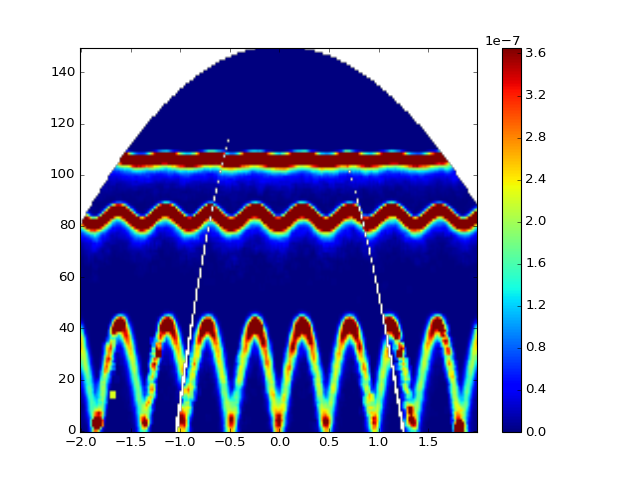

In [68]:
H.plot(hh.load("./slice_0K0_v4.h5"), min=0.0)